First, import the _pandas_ library with its usual alias, `pd`.

Also, import the _pyplot_ module of the _matplotlib_ library with alias `plt`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Next, import the vaccines data (contained in the file `COVID_CountByZipPerDate 03292021.csv` in the `data` folder. Save it in a DataFrame named `cases`.

In [2]:
cases = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')

Take a look at this DataFrame so that you have an understanding of how it is structured.

In [3]:
cases

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
...,...,...,...
8827,3/27/2021,37210.0,1
8828,3/27/2021,37211.0,1
8829,3/27/2021,37212.0,1
8830,3/27/2021,37214.0,2


**Question:** Which zip code has the highest total number of cases?

In [4]:
cases.groupby('Zip')['Cases'].sum()

Zip
37013.0    13354
37027.0      231
37069.0       16
37072.0     2984
37076.0     4279
37080.0      574
37115.0     4574
37138.0     2359
37189.0      479
37201.0      299
37203.0     3346
37204.0     1786
37205.0     2566
37206.0     3112
37207.0     4729
37208.0     2428
37209.0     5072
37210.0     2100
37211.0    10233
37212.0     1823
37213.0       65
37214.0     3508
37215.0     2438
37216.0     2011
37217.0     3907
37218.0     1785
37219.0      270
37220.0      656
37221.0     3910
37228.0      310
37238.0        3
Name: Cases, dtype: int64

Now, we're going to look at the overall trend in number of cases across the whole county.

Start by aggregating to get a total count of cases per date (across all zip codes). Convert the result to a DataFrame named `total_cases`.

In [5]:
total_cases = cases.groupby('Specimen Collection Date')['Cases'].sum()
total_cases = total_cases.reset_index()

Convert the Specimen Collection Date column to the datetime type.

In [6]:
total_cases['Specimen Collection Date'] = pd.to_datetime(total_cases['Specimen Collection Date'])

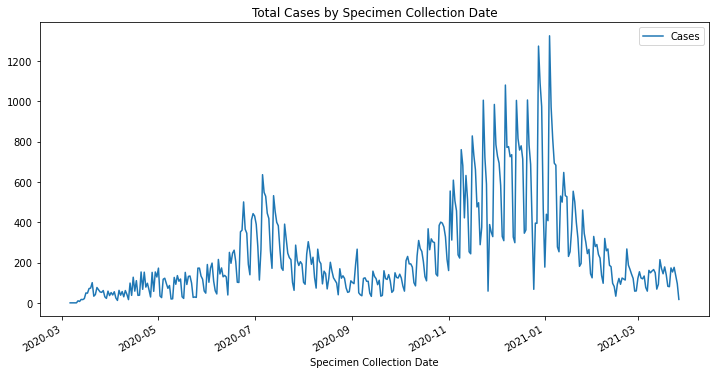

In [7]:
total_cases.plot(x = 'Specimen Collection Date', y = 'Cases', figsize = (12,6))

plt.title('Total Cases by Specimen Collection Date');

Create a new column which contains the cumulative number of cases per day.

**Note:** Be sure to sort the values by date prior to doing this calculation.

In [8]:
total_cases = total_cases.sort_values('Specimen Collection Date')

total_cases['cumulative_cases'] = total_cases['Cases'].cumsum()

Now, plot the results.

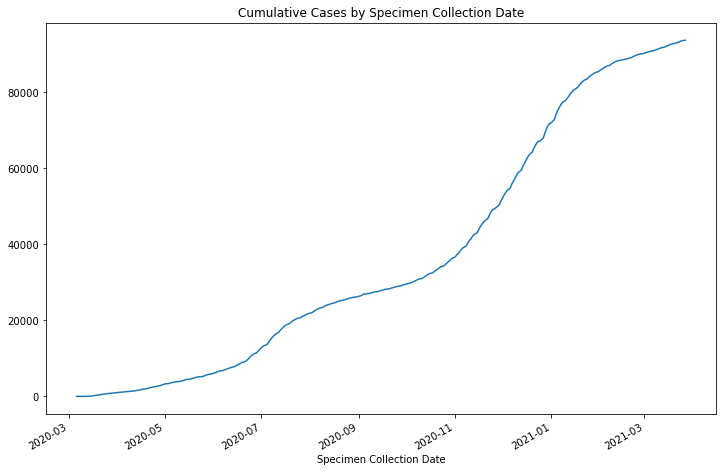

In [31]:
total_cases.plot(x = 'Specimen Collection Date', y = 'cumulative_cases', figsize = (12,8), legend = False)

plt.title('Cumulative Cases by Specimen Collection Date');

Finally, let's compare the growth in number of cases across two zip codes - 37203 (the Gulch/West End area - an area with about 15,091 residents) and 37212 (Belmont/Hillsboro - an area with about 20,803 residents).

**First,** create two dataframes, `cases_37203` and `cases_37212` containing the data for the two zip codes.

In [70]:
cases_37203 = cases[cases['Zip'] == 37203]
cases_37212 = cases[cases['Zip'] == 37212]

**Next,** create columns in each dataframe containing the cumulative counts. (Make sure that the date column is the correct type before doing this).

In [44]:
cases_37203['Specimen Collection Date'] = pd.to_datetime(cases_37203['Specimen Collection Date'])
cases_37203 = cases_37203.sort_values('Specimen Collection Date')
cases_37203['cumulative_count'] = cases_37203['Cases'].cumsum()

cases_37212['Specimen Collection Date'] = pd.to_datetime(cases_37212['Specimen Collection Date'])
cases_37212 = cases_37212.sort_values('Specimen Collection Date')
cases_37212['cumulative_count'] = cases_37212['Cases'].cumsum()

**Finaly,** plot the cumulative counts for each zip code on the same plot. What do you notice from this plot?

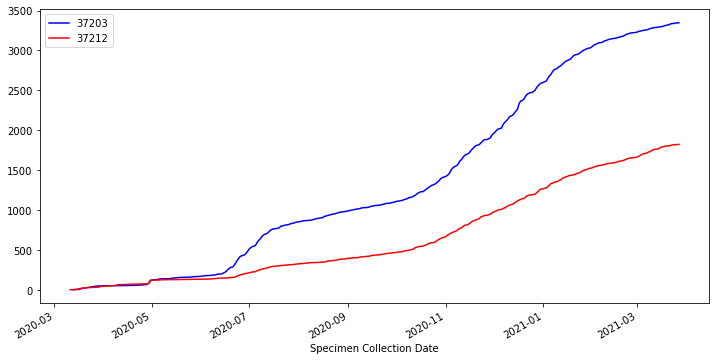

In [47]:
fig, ax = plt.subplots(figsize = (12,6))

cases_37203.plot(kind = 'line',
                     x = 'Specimen Collection Date', 
                     y = 'cumulative_count',
                 color = 'blue',
                     ax = ax,                    
                     label = '37203')     

cases_37212.plot(kind = 'line',
                     x = 'Specimen Collection Date', 
                     y = 'cumulative_count',
                     color = 'red',
                     ax = ax,                               
                     label = '37212');   